### Notebook to visualize HAC clustering results from larger holdout data

Plot HAC clustering from sklearn article: [Plot Hierarchical Clustering Dendrogram](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py)

In [18]:
%matplotlib inline
import os
import gc
import glob
import pickle
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Visualization for dendrogram
from scipy.cluster.hierarchy import dendrogram

In [2]:
from sklearn.metrics import adjusted_mutual_info_score as AMI
from sklearn.metrics import normalized_mutual_info_score as NMI
from sklearn.metrics import adjusted_rand_score as ARS
from sklearn.metrics import completeness_score as CLS

In [3]:
def pkl_loader(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

In [3]:
#basedatadir = './large_hac1'  # 09152020 
basedatadir = './large_hac2'   # 09152020: clustering rotate&copy and rotate them again for clustering2 

In [4]:
def file_getter(basedatadir=None, expname=None, nclusters=None, cexpname=None,score_only=True):
    """ TODO in future specify clustering expname"""
    datadir = os.path.join(basedatadir, f"{expname}/nclusters-{nclusters}/HAC")
    try:
        tmp = glob.glob(os.path.join(datadir, f'*{cexpname}.pkl'))
        a = [i for i in tmp]
        print("Begin loading result files")
    except Exception as e:
        print(e)
        
    scores =  pkl_loader(
            glob.glob(os.path.join(datadir, f"score-hac_{cexpname}.pkl"))[0]
    )
    if not score_only:
        omodel =  pkl_loader(
            glob.glob(os.path.join(datadir, f"original-hac_{cexpname}.pkl"))[0]
        )
        rmodel =  pkl_loader(
            glob.glob(os.path.join(datadir, f"reprot-hac_{cexpname}.pkl"))[0]
        )
        return scores, omodel, rmodel
    else:
        return scores

---------------
#### RI

In [18]:
scoreRI2000 = file_getter(basedatadir=basedatadir, expname='67011582', cexpname="4583049",
                          nclusters=2000, score_only=True)

Begin loading result files


In [25]:
scoreRI2000

{'nclusters-2000': {'ami': -0.0030743676592053857,
  'cls': 0.7890443390587428,
  'hs': 0.682182417322676}}

In [27]:
scoreRI2000 = file_getter(basedatadir=basedatadir, expname='67011582', cexpname="4585449",
                          nclusters=2000, score_only=True)

Begin loading result files


In [28]:
scoreRI2000

{'nclusters-2000': {'ami': -0.003906495780173582,
  'cls': 0.7258206222790605,
  'hs': 0.6240351687680873}}

In [20]:
scoreRI100 = file_getter(basedatadir=basedatadir, expname='67011582', cexpname="4583334",
                          nclusters=100, score_only=True)

Begin loading result files


In [21]:
scoreRI100

{'nclusters-100': {'ami': 0.49775915133408816,
  'cls': 0.5250588276607263,
  'hs': 0.5837425612029344}}

In [29]:
scoreRI20 = file_getter(basedatadir=basedatadir, expname='67011582', cexpname="4585692",
                          nclusters=20, score_only=True)
scoreRI20

Begin loading result files


{'nclusters-20': {'ami': 0.3727912117267518,
  'cls': 0.3694863967388016,
  'hs': 0.3875373646654667}}

In [30]:
scoreRI10 = file_getter(basedatadir=basedatadir, expname='67011582', cexpname="4585694",
                          nclusters=10, score_only=True)
scoreRI10

Begin loading result files


{'nclusters-10': {'ami': 0.2749294249104568,
  'cls': 0.270921330463771,
  'hs': 0.2827657385164835}}

In [32]:
scoresRI = []
for cexpname, nclusters in zip(
    [4586180,4586181,4586182,4586183,4586184,4586185,4586186,4586179 ],
    [2,4,8,16,32,64,128,256]
    ):
    tmp_score = file_getter(basedatadir=basedatadir, expname='67011582', cexpname=str(cexpname),
                          nclusters=nclusters, score_only=True)
    scoresRI.append(tmp_score)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [33]:
scoresRI

[{'nclusters-2': {'ami': -0.00012688068273619858,
   'cls': 8.3908108888613345e-16,
   'hs': 1.1139569852771803e-15}},
 {'nclusters-4': {'ami': 0.1623027487483164,
   'cls': 0.1551559466782175,
   'hs': 0.1711232043322862}},
 {'nclusters-8': {'ami': 0.19606965608493074,
   'cls': 0.19580718330938102,
   'hs': 0.1990257661609034}},
 {'nclusters-16': {'ami': 0.36363988634507727,
   'cls': 0.3496807006622599,
   'hs': 0.38705005566309214}},
 {'nclusters-32': {'ami': 0.4564321286457516,
   'cls': 0.4437581757689382,
   'hs': 0.4941132735877916}},
 {'nclusters-64': {'ami': 0.47742376135150927,
   'cls': 0.4839587039323898,
   'hs': 0.5392947849802405}},
 {'nclusters-128': {'ami': 0.5072805550995583,
   'cls': 0.5456484135659448,
   'hs': 0.6083612546860472}},
 {'nclusters-256': {'ami': 0.5068012896885425,
   'cls': 0.5838944078925472,
   'hs': 0.6627520560607516}}]

--------------
#### RI after left out non structured patches

In [54]:
scoreRI674, orimodel, rimodel = file_getter(basedatadir=basedatadir, expname='67011582', cexpname="4590898",
                          nclusters=674, score_only=False)
scoreRI674

Begin loading result files


/software/python-anaconda-2020.02-el7-x86_64/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator AgglomerativeClustering from version 0.23.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


{'nclusters-674': {'ami': -0.004311490039035771,
  'cls': 0.7694366410700049,
  'hs': 0.7102996621677017}}

In [55]:
orimodel_labels = orimodel.labels_
rimodel_labels = rimodel.labels_

In [56]:
orimodel_labels[:100]

array([618, 667, 626, 665, 673, 634, 597, 636, 661, 455, 500, 586, 642,
       655, 497, 575, 438, 644, 447, 580, 361, 593, 606, 559, 408, 382,
       525, 448, 540, 552, 424, 550, 553, 464, 545, 466, 378, 491, 565,
       533, 468, 592, 549, 418, 445, 627, 641, 602, 508, 643, 616, 435,
       663, 620, 567, 617, 566, 651, 442, 649, 428, 465, 622, 600, 390,
       437, 614, 625, 546, 434, 652, 539, 611, 409, 232, 325, 395, 555,
       571, 547, 345, 456, 463, 647, 274, 223, 591, 503, 427, 521, 355,
       623, 231, 467, 495, 543, 576, 487, 419, 431])

In [57]:
rimodel_labels[:100]

array([  6, 578, 393, 441, 176, 115,  52, 175, 303, 330, 393, 309, 176,
       330,  64, 243, 176, 115,  52, 175, 303, 114, 617, 243, 328, 578,
       393, 441, 328, 517,  70, 552, 176, 114, 617, 636, 327,  43, 127,
       494, 303, 114, 617, 243, 176, 115, 617, 175, 176, 115, 617, 636,
        46, 114,  64, 504,  20, 578, 333, 336,  14, 119,  70, 552,  14,
       114, 456, 326,  20, 115,  52, 175, 209, 142, 134,  10, 638, 458,
        61, 206, 477, 162, 195,  33, 120, 578, 123, 166, 328, 112, 123,
       441, 124, 288,  54, 464, 124, 458,  61, 206])

In [63]:
np.max(rimodel_labels)

673

In [71]:
np.where(rimodel_labels == 578)[0]//4

array([  0,   6,  14,  21,  33,  37,  44,  59,  65, 155, 178, 262, 263,
       281, 302, 319, 403, 483, 484, 505, 512, 528, 529, 536, 556, 597,
       607, 611, 612])

After debugging of selected index 

In [73]:
scoresRI = []
for cexpname, nclusters in zip(
    [4591360, 4591361, 4591362,4591363,4591364, 4591365, 4591366,4591359],
    [2,4,8,16,32,64,128,256]
    ):
    tmp_score = file_getter(basedatadir=basedatadir, expname='67011582', cexpname=str(cexpname),
                          nclusters=nclusters, score_only=True)
    scoresRI.append(tmp_score)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [74]:
scoresRI 

[{'nclusters-2': {'ami': -0.0003187614035202872, 'cls': 0.0, 'hs': 0.0}},
 {'nclusters-4': {'ami': -0.0012338901741523265,
   'cls': 1.6017132519074586e-16,
   'hs': 1.6726832409356116e-16}},
 {'nclusters-8': {'ami': 0.2371615569549225,
   'cls': 0.2285255201999385,
   'hs': 0.2546356478011065}},
 {'nclusters-16': {'ami': 0.2868797017755245,
   'cls': 0.28999011436304134,
   'hs': 0.30946702197881837}},
 {'nclusters-32': {'ami': 0.36934627648230267,
   'cls': 0.3961926336582112,
   'hs': 0.4173295135427449}},
 {'nclusters-64': {'ami': 0.392455738298038,
   'cls': 0.4791146875565044,
   'hs': 0.49484173270304715}},
 {'nclusters-128': {'ami': 0.37965359793293607,
   'cls': 0.5620717915066537,
   'hs': 0.5785309653574207}},
 {'nclusters-256': {'ami': 0.3249241553894448,
   'cls': 0.6398029584166206,
   'hs': 0.6525864333600652}}]

In [77]:
# copy size increase from 4 to 12
scoreRI300 = file_getter(basedatadir=basedatadir, expname='67011582', cexpname="4595995",
                          nclusters=300, score_only=True)
scoreRI300

Begin loading result files


{'nclusters-300': {'ami': -0.016010367780507573,
  'nmi': 0.5224396879957052,
  'cls': 0.538280117350661,
  'hs': 0.507504907072814,
  'ars': -0.003850189810453388}}

In [79]:
# copy size increase from 12 to 24
scoreRI300 = file_getter(basedatadir=basedatadir, expname='67011582', cexpname="4596305",
                          nclusters=300, score_only=True)
scoreRI300

Begin loading result files


{'nclusters-300': {'ami': 0.08048845589254608,
  'nmi': 0.4691174533448532,
  'cls': 0.47970336474892916,
  'hs': 0.4589886660334527,
  'ars': 0.01260017657611253}}

In [83]:
scoresRI = []
for cexpname, nclusters in zip(
    [4596433,4596434,4596479,4596481,4596507,4596513,4596432],
    [2,4,8,16,32,64,128]
    ):
    tmp_score = file_getter(basedatadir=basedatadir, expname='67011582', cexpname=str(cexpname),
                          nclusters=nclusters, score_only=True)
    scoresRI.append(tmp_score)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [84]:
scoresRI

[{'nclusters-2': {'ami': -0.00010393628141146943,
   'nmi': 3.438735347612704e-08,
   'cls': 3.383067363938149e-08,
   'hs': 3.4962660018309707e-08,
   'ars': -0.00010748196611937699}},
 {'nclusters-4': {'ami': -8.061710320814813e-05,
   'nmi': 0.00040254349569967195,
   'cls': 0.0003812375531387048,
   'hs': 0.0004263718240421079,
   'ars': -0.0002964264207650843}},
 {'nclusters-8': {'ami': 0.09040616516847451,
   'nmi': 0.09205709610453243,
   'cls': 0.08515839122957922,
   'hs': 0.10017206266333763,
   'ars': 0.05496634724730505}},
 {'nclusters-16': {'ami': 0.17643446182834527,
   'nmi': 0.18150740921904535,
   'cls': 0.17373826822137634,
   'hs': 0.19000390900748876,
   'ars': 0.07659856549735698}},
 {'nclusters-32': {'ami': 0.2051621427401649,
   'nmi': 0.2227250937085756,
   'cls': 0.21251787666856842,
   'hs': 0.233962283958033,
   'ars': 0.06302294169651051}},
 {'nclusters-64': {'ami': 0.22595606407249735,
   'nmi': 0.2839857444953736,
   'cls': 0.26925407510923055,
   'hs': 0.

------------
### RI for large_hac2

In [5]:
scoreRI300 = file_getter(basedatadir=basedatadir, expname='67011582', cexpname="4612631",
                          nclusters=300, score_only=True)
scoreRI300

Begin loading result files


{'nclusters-300': {'ami': 0.00898441385138554,
  'nmi': 0.5566530469678308,
  'cls': 0.5689985558920936,
  'hs': 0.5448318801666692,
  'ars': 0.0023141046704895462}}

In [6]:
scoreRI900 = file_getter(basedatadir=basedatadir, expname='67011582', cexpname="4613243",
                          nclusters=900, score_only=True)
scoreRI900

Begin loading result files


{'nclusters-900': {'ami': 0.0005272858169453541,
  'nmi': 0.8104582828892518,
  'cls': 0.820595191775831,
  'hs': 0.8005687628340249,
  'ars': 0.00017800267670335215}}

In [12]:
scoresRI = []
for cexpname, nclusters in zip(
    [4613870,4613871,4613872,4613873,4613874,4613875,4613876,4613869 ],
    [2,4,8,16,32,64,128,256]
    ):
    tmp_score = file_getter(basedatadir=basedatadir, expname='67011582', cexpname=str(cexpname),
                          nclusters=nclusters, score_only=True)
    scoresRI.append(tmp_score)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [13]:
scoresRI

[{'nclusters-2': {'ami': -0.0004184622998092793,
   'nmi': 1.3361478005724782e-15,
   'cls': 1.2817404583059683e-15,
   'hs': 1.3953788681240312e-15,
   'ars': -0.0004941700564436845}},
 {'nclusters-4': {'ami': 0.005619860844303482,
   'nmi': 0.007460760419080556,
   'cls': 0.007328828257198745,
   'hs': 0.007597529692713958,
   'ars': 0.0023955107011968367}},
 {'nclusters-8': {'ami': 0.036227896709882426,
   'nmi': 0.042867539849945735,
   'cls': 0.04326654575150042,
   'hs': 0.04247582599914723,
   'ars': 0.032789611766941236}},
 {'nclusters-16': {'ami': 0.012436170209568567,
   'nmi': 0.03629361768592584,
   'cls': 0.0365289577502909,
   'hs': 0.036061290596059815,
   'ars': 0.005867381347942263}},
 {'nclusters-32': {'ami': 0.04939463241828103,
   'nmi': 0.13102000877347614,
   'cls': 0.12978955153198238,
   'hs': 0.1322740197749198,
   'ars': 0.009414446993107221}},
 {'nclusters-64': {'ami': 0.03138086922915096,
   'nmi': 0.2579751241790432,
   'cls': 0.25396189013192083,
   'hs': 

In [14]:
scoresRI = []
for cexpname, nclusters in zip(
    [4614213,4614214,4614215,4614212],
    [300,600,1200,1800]
    ):
    tmp_score = file_getter(basedatadir=basedatadir, expname='67011582', cexpname=str(cexpname),
                          nclusters=nclusters, score_only=True)
    scoresRI.append(tmp_score)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [15]:
scoresRI

[{'nclusters-300': {'ami': 0.009496271867196029,
   'nmi': 0.5580367656268055,
   'cls': 0.569842430169431,
   'hs': 0.5467103383293805,
   'ars': 0.0024753976321580723}},
 {'nclusters-600': {'ami': 0.0021019794212184645,
   'nmi': 0.7043556583222643,
   'cls': 0.7194962104757199,
   'hs': 0.6898391868878054,
   'ars': 0.000585275726593785}},
 {'nclusters-1200': {'ami': 0.0021992511761869055,
   'nmi': 0.8970509822088463,
   'cls': 0.9042815829700399,
   'hs': 0.8899350954104517,
   'ars': 0.0010964642767450187}},
 {'nclusters-1800': {'ami': 1.0,
   'nmi': 1.0,
   'cls': 1.0,
   'hs': 1.0,
   'ars': 1.0}}]

-------------

-------------
#### NRI

In [22]:
scoreNRI2000 = file_getter(basedatadir=basedatadir,
                           expname='m2_02_global_2000_2018_band28_29_31', cexpname="4583443",
                           nclusters=2000, score_only=True)

Begin loading result files


In [24]:
scoreNRI2000

{'nclusters-2000': {'ami': 0.3396396788708435,
  'cls': 0.8894683429034593,
  'hs': 0.750603589555923}}

In [23]:
scoreNRI100 = file_getter(basedatadir=basedatadir,
                           expname='m2_02_global_2000_2018_band28_29_31', cexpname="4583475",
                           nclusters=100, score_only=True)

Begin loading result files


In [26]:
scoreNRI100

{'nclusters-100': {'ami': 0.6400035633954669,
  'cls': 0.6671413142366469,
  'hs': 0.6935826582810746}}

In [34]:
# copy_size 4
scoresNRI = []
for cexpname, nclusters in zip(
    [4586634,4586635,4586636,4586637,4586638,4586639,4586640,4586630],
    [2,4,8,16,32,64,128,256]
    ):
    tmp_score = file_getter(basedatadir=basedatadir, 
                            expname='m2_02_global_2000_2018_band28_29_31', cexpname=str(cexpname),
                          nclusters=nclusters, score_only=True)
    scoresNRI.append(tmp_score)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [35]:
scoresNRI 

[{'nclusters-2': {'ami': 0.4128594447505487,
   'cls': 0.47886543767205425,
   'hs': 0.3633319633431876}},
 {'nclusters-4': {'ami': 0.7667494909799751,
   'cls': 0.7476850590746659,
   'hs': 0.7880485465401278}},
 {'nclusters-8': {'ami': 0.6477535971893129,
   'cls': 0.6367982398847724,
   'hs': 0.6650142485913162}},
 {'nclusters-16': {'ami': 0.6606824208484383,
   'cls': 0.6583685809797838,
   'hs': 0.683374325395819}},
 {'nclusters-32': {'ami': 0.6727681693574846,
   'cls': 0.6863959105393157,
   'hs': 0.7180655271574099}},
 {'nclusters-64': {'ami': 0.7329132118741402,
   'cls': 0.7680096277501182,
   'hs': 0.7993717226610066}},
 {'nclusters-128': {'ami': 0.7253333110071576,
   'cls': 0.8247853408445397,
   'hs': 0.8070757610746954}},
 {'nclusters-256': {'ami': 0.5981808135158303,
   'cls': 0.881317781635395,
   'hs': 0.7321460932830813}}]

In [36]:
scoreNRI10 = file_getter(basedatadir=basedatadir,
                           expname='m2_02_global_2000_2018_band28_29_31', cexpname="4585656",
                           nclusters=10, score_only=True)

Begin loading result files


In [37]:
scoreNRI10

{'nclusters-10': {'ami': 0.7572164790708689,
  'cls': 0.7280917000833951,
  'hs': 0.795763362793223}}

--------------
#### NRI after left out non structured patches

In [72]:
scoreNRI674, orimodel, rimodel = file_getter(basedatadir=basedatadir,
                            expname='m2_02_global_2000_2018_band28_29_31', cexpname="4591099",
                            nclusters=674, score_only=False)
scoreNRI674

Begin loading result files


/software/python-anaconda-2020.02-el7-x86_64/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator AgglomerativeClustering from version 0.23.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


{'nclusters-674': {'ami': 0.13615622130444227,
  'cls': 0.80655517579,
  'hs': 0.7387182640492443}}

After debugging 

In [75]:
scoresNRI = []
for cexpname, nclusters in zip(
    [4591373,4591429,4591449,4591450,4591451,4591452,4591587,4591372 ],
    [2,4,8,16,32,64,128,256]
    ):
    tmp_score = file_getter(basedatadir=basedatadir, 
                            expname='m2_02_global_2000_2018_band28_29_31', cexpname=str(cexpname),
                          nclusters=nclusters, score_only=True)
    scoresNRI.append(tmp_score)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [76]:
scoresNRI

[{'nclusters-2': {'ami': 0.6345534910991922,
   'cls': 0.6243102293391076,
   'hs': 0.6453455036011481}},
 {'nclusters-4': {'ami': 0.49519415777385545,
   'cls': 0.50291832107349,
   'hs': 0.48897604689229973}},
 {'nclusters-8': {'ami': 0.4234319868539766,
   'cls': 0.4334429667685152,
   'hs': 0.41908500382967107}},
 {'nclusters-16': {'ami': 0.4174203241392342,
   'cls': 0.4303661031763206,
   'hs': 0.4237860791018749}},
 {'nclusters-32': {'ami': 0.4136720532550572,
   'cls': 0.44784490276575956,
   'hs': 0.4495099159397826}},
 {'nclusters-64': {'ami': 0.4235108582888609,
   'cls': 0.514021114901282,
   'hs': 0.5251646761032006}},
 {'nclusters-128': {'ami': 0.41570301231502427,
   'cls': 0.5873827361268931,
   'hs': 0.6115586157904154}},
 {'nclusters-256': {'ami': 0.3806636412411501,
   'cls': 0.6776555603769518,
   'hs': 0.6829078622547784}}]

In [78]:
### copy_size = 12
scoreNRI300, orimodel, rimodel = file_getter(basedatadir=basedatadir,
                            expname='m2_02_global_2000_2018_band28_29_31', cexpname="4596123",
                            nclusters=300, score_only=False)
scoreNRI300

Begin loading result files


{'nclusters-300': {'ami': 0.19720699847391798,
  'nmi': 0.6107663706735132,
  'cls': 0.6371547883788087,
  'hs': 0.5864768323858783,
  'ars': 0.05756680248680777}}

In [80]:
### copy_size = 12
scoreNRI300, orimodel, rimodel = file_getter(basedatadir=basedatadir,
                            expname='m2_02_global_2000_2018_band28_29_31', cexpname="4596308",
                            nclusters=300, score_only=False)
scoreNRI300

Begin loading result files


{'nclusters-300': {'ami': 0.24760808481968782,
  'nmi': 0.5609934733133397,
  'cls': 0.5766054839125432,
  'hs': 0.5462045889378914,
  'ars': 0.06051352551642502}}

------------
### NRI for large_hac2

In [9]:
scoreNRI900 = file_getter(basedatadir=basedatadir,
                            expname='m2_02_global_2000_2018_band28_29_31', cexpname="4613441",
                            nclusters=900, score_only=True)
scoreNRI900

Begin loading result files


{'nclusters-900': {'ami': -0.003156671818971873,
  'nmi': 0.8127858625149781,
  'cls': 0.8251590502164042,
  'hs': 0.800778262589075,
  'ars': -0.0012723912595160615}}

In [16]:
scoresNRI = []
for cexpname, nclusters in zip(
    [4613865,4613866,4613867,4614079,4614089,4614097,4614259,4613864,4614416,4614848,4614864,4614232],
    [2,4,8,16,32,64,128,256, 300,600,1200,1800]
    ):
    tmp_score = file_getter(basedatadir=basedatadir, 
                            expname='m2_02_global_2000_2018_band28_29_31', cexpname=str(cexpname),
                          nclusters=nclusters, score_only=True)
    scoresNRI.append(tmp_score)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [17]:
scoresNRI

[{'nclusters-2': {'ami': -0.0003627159255383943,
   'nmi': 5.614681211732896e-05,
   'cls': 5.816349409530686e-05,
   'hs': 5.426529113307591e-05,
   'ars': 0.00014608415071079074}},
 {'nclusters-4': {'ami': -0.0016180774872945856,
   'nmi': 0.0003582817541748294,
   'cls': 0.00037004640827455063,
   'hs': 0.00034724210309217856,
   'ars': -0.0007704027141881021}},
 {'nclusters-8': {'ami': -0.0011593513091790284,
   'nmi': 0.005735687030735304,
   'cls': 0.00589729229686477,
   'hs': 0.005582702561300036,
   'ars': -0.0015401142533288089}},
 {'nclusters-16': {'ami': -0.002834725734318896,
   'nmi': 0.022471109634432405,
   'cls': 0.022130561068923953,
   'hs': 0.022822302831324307,
   'ars': 0.00023241004861820962}},
 {'nclusters-32': {'ami': -0.009766979014561,
   'nmi': 0.07912075679278303,
   'cls': 0.0785532126072698,
   'hs': 0.07969656163462015,
   'ars': -0.0016145018820059116}},
 {'nclusters-64': {'ami': -0.014132195631963407,
   'nmi': 0.2252195961582898,
   'cls': 0.222996795

In [21]:
scoresNRI[1]['nclusters-4']['cls']

0.00037004640827455063

----------
### Visualize clouds in figure

In [5]:
def extract_metric_fn(expname=None, cexpname_list=[], nclusters_list=[], metric=None ):
    scores = []
    for cexpname, nclusters in zip(cexpname_list, nclusters_list):
        tmp_score = file_getter(basedatadir=basedatadir, expname=expname, cexpname=str(cexpname),
                          nclusters=nclusters, score_only=True)
        scores.append(tmp_score[f'nclusters-{nclusters}'][metric])
    return scores

In [23]:
nmiRIs = extract_metric_fn(expname='67011582',metric='nmi', 
                        cexpname_list=[4613870,4613871,4613872,4613873,4613874,4613875,4613876,4613869,
                                      4614213,4614214,4613243,4614215,4614212
                                      ], 
                        nclusters_list=[2,4,8,16,32,64,128,256, 300,600,900,1200,1800],  )

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [25]:
nmiNRIs = extract_metric_fn(expname='m2_02_global_2000_2018_band28_29_31',metric='nmi', 
                        cexpname_list=[4613865,4613866,4613867,4614079,4614089,4614097,
                                       4614259,4613864,4614416,4614848,4613441,4614864,4614232], 
                        nclusters_list=[2,4,8,16,32,64,128,256, 300,600,900,1200,1800],  )

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


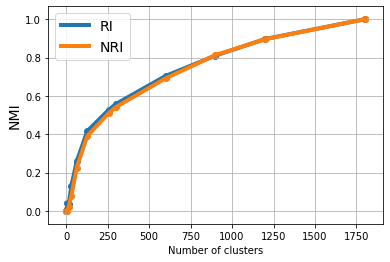

In [47]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'NMI'
nclusters_list=[2,4,8,16,32,64,128,256, 300,600,900,1200,1800]
for idx, ilist in enumerate([nmiRIs, nmiNRIs]):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

--------------------------
### Analysis; large_hac3
Select one patch from "k" clusters and then replicate and rotate these selected patch 

In [49]:
basedatadir = './large_hac3'

#### RI

In [51]:
scoreRI32 = file_getter(basedatadir=basedatadir,
                            expname='67011582', cexpname="4619131",
                            nclusters=32, score_only=True)
scoreRI32

Begin loading result files


{'nclusters-32': {'ami': -0.06888663611889909,
  'nmi': 0.45150194905351737,
  'cls': 0.4610778107596887,
  'hs': 0.4423157459552787,
  'ars': -0.03121767926443936}}

In [52]:
# 36 rotations
scoreRI128 = file_getter(basedatadir=basedatadir,
                            expname='67011582', cexpname="4619458",
                            nclusters=128, score_only=True)
scoreRI128

Begin loading result files


{'nclusters-128': {'ami': 0.17657119916169484,
  'nmi': 0.40896703332535683,
  'cls': 0.4150585263539748,
  'hs': 0.40305175440387403,
  'ars': 0.027074713617884136}}

In [55]:
## 12 rotations
scoresRI = []
for cexpname, nclusters in zip(
    [4620107,4620108,4620109,4620110,4620106],
    [4,8,16,64,128]
    ):
    tmp_score = file_getter(basedatadir=basedatadir, 
                            expname='67011582', cexpname=str(cexpname),
                          nclusters=nclusters, score_only=True)
    scoresRI.append(tmp_score)
scoresRI

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


[{'nclusters-4': {'ami': 0.07782559035007129,
   'nmi': 0.1528952574451689,
   'cls': 0.15835719859770292,
   'hs': 0.14779753260092743,
   'ars': 0.03021028729390861}},
 {'nclusters-8': {'ami': 0.0388137868630714,
   'nmi': 0.18297858580241597,
   'cls': 0.18596781804963902,
   'hs': 0.1800839307028972,
   'ars': 0.017241379310344827}},
 {'nclusters-16': {'ami': -0.10225144423089996,
   'nmi': 0.16725278164471402,
   'cls': 0.1681216640602912,
   'hs': 0.166392834127187,
   'ars': -0.03603084864342912}},
 {'nclusters-64': {'ami': -0.042867316172618165,
   'nmi': 0.38475089367637605,
   'cls': 0.39093004867628967,
   'hs': 0.3787640382059595,
   'ars': -0.012778715752550589}},
 {'nclusters-128': {'ami': -0.022712954612997764,
   'nmi': 0.47255773172724763,
   'cls': 0.478110785946102,
   'hs': 0.46713218925765715,
   'ars': -0.0067624520821584575}}]

In [57]:
scoreRI4, omodel,rmodel = file_getter(basedatadir=basedatadir,
                            expname='67011582', cexpname="4620107",
                            nclusters=4, score_only=False)

Begin loading result files


In [68]:
for i in range(4):
    print(rmodel.labels_[12*i:(i+1)*12])

[3 1 1 1 1 1 2 2 0 0 0 0]
[3 3 3 3 3 3 2 2 2 0 0 0]
[3 3 3 3 3 3 2 2 2 0 0 0]
[3 3 3 3 3 3 2 2 2 0 0 0]


check whehter code is fine or not

In [74]:
label = []
for i in range(4):
    tmp = [i for j in range(12)]
    label.extend(tmp)
label = np.asarray(label)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3])

In [77]:
AMI(label, rmodel.labels_), NMI(label, rmodel.labels_)

(0.07782559035007129, 0.1528952574451689)

In [78]:
AMI(label, nrmodel.labels_),NMI(label, nrmodel.labels_)

(0.46804793891648805, 0.5104259822899803)

------------
#### NRI

In [50]:
scoreNRI32 = file_getter(basedatadir=basedatadir,
                            expname='m2_02_global_2000_2018_band28_29_31', cexpname="4619131",
                            nclusters=32, score_only=True)
scoreNRI32

Begin loading result files


{'nclusters-32': {'ami': 0.16090232293184017,
  'nmi': 0.5536293272841216,
  'cls': 0.5761360771590381,
  'hs': 0.5328149180405689,
  'ars': 0.07075881988172182}}

In [54]:
# 36 rotations
scoreNRI128 = file_getter(basedatadir=basedatadir,
                            expname='m2_02_global_2000_2018_band28_29_31', cexpname="4619467",
                            nclusters=128, score_only=True)
scoreNRI128

Begin loading result files


{'nclusters-128': {'ami': 0.33910916308029887,
  'nmi': 0.525075330237258,
  'cls': 0.5335111975035323,
  'hs': 0.5169020858770214,
  'ars': 0.10018243735551202}}

In [56]:
## 12 rotations
scoresNRI = []
for cexpname, nclusters in zip(
    [4620116,4620117,4620126,4620127,4620115],
    [4,8,16,64,128]
    ):
    tmp_score = file_getter(basedatadir=basedatadir, 
                            expname='m2_02_global_2000_2018_band28_29_31', cexpname=str(cexpname),
                          nclusters=nclusters, score_only=True)
    scoresNRI.append(tmp_score)
scoresNRI

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


[{'nclusters-4': {'ami': 0.46804793891648805,
   'nmi': 0.5104259822899803,
   'cls': 0.5212960286143201,
   'hs': 0.5000000000000001,
   'ars': 0.3166397415185783}},
 {'nclusters-8': {'ami': 0.567170261077482,
   'nmi': 0.6322557794258817,
   'cls': 0.6635753974753833,
   'hs': 0.6037593748197108,
   'ars': 0.3344501979896436}},
 {'nclusters-16': {'ami': 0.4219780741018343,
   'nmi': 0.5555998159225498,
   'cls': 0.5874102012468021,
   'hs': 0.5270577347742967,
   'ars': 0.19753500998937862}},
 {'nclusters-64': {'ami': 0.18491671075161728,
   'nmi': 0.5205019985092033,
   'cls': 0.5283002200097978,
   'hs': 0.5129306467544004,
   'ars': 0.09439753791163245}},
 {'nclusters-128': {'ami': 0.15680364959667095,
   'nmi': 0.562302569710927,
   'cls': 0.570480132788882,
   'hs': 0.5543561364991142,
   'ars': 0.06959796786148885}}]

In [71]:
scoreNRI4, nomodel,nrmodel = file_getter(basedatadir=basedatadir,
                            expname='m2_02_global_2000_2018_band28_29_31', cexpname="4620116",
                            nclusters=4, score_only=False)

Begin loading result files


In [72]:
for i in range(4):
    print(nrmodel.labels_[12*i:(i+1)*12])

[0 3 3 0 3 3 0 3 3 0 3 3]
[0 1 1 0 1 1 0 1 1 0 1 1]
[0 1 1 0 1 1 0 1 1 0 1 1]
[0 2 2 0 2 2 0 2 2 0 2 2]


--------------------------
### Analysis; large_hac4
Same: Select one patch from "k" clusters and then replicate and rotate these selected patch   
Diff: (1) change dataeset from 2-10 to 3-0(stdv over patches is the largest). (2) clustering all 2,000 patches into "k" clusters no matter what patch is less gradation or not

In [81]:
basedatadir = './large_hac4'

#### RI

In [84]:
scoreRI32, x, y = file_getter(basedatadir=basedatadir,
                            expname='67011582', cexpname="4621265",
                            nclusters=32, score_only=False)
scoreRI32

Begin loading result files


{'nclusters-32': {'ami': -0.04281942218509095,
  'nmi': 0.30958685102425837,
  'cls': 0.31132563695898535,
  'hs': 0.3078673798139505,
  'ars': -0.01104429600575244}}

In [85]:
y.labels_

array([ 0, 27, 22, 23,  2,  4, 20,  6,  1, 31,  5,  9, 29, 10, 15, 28, 13,
       18, 30, 16,  7, 14,  3, 19, 29, 10, 15, 28, 13, 18, 21, 16,  7, 14,
        3, 19,  0, 27, 22, 12,  2,  4, 20,  6,  1, 17,  5,  9, 25, 10, 15,
       12, 13, 18, 21, 16,  7, 14,  3, 19,  0, 22, 22, 23,  2,  4, 20,  6,
        1, 17,  5,  9,  0, 22, 22, 12,  2,  4, 30,  6,  1, 17,  5,  9,  0,
       27, 22, 23,  2,  4, 20,  6,  1, 17,  5,  9, 29, 10, 15, 28, 13, 18,
       21, 16,  7, 14,  3, 19, 29, 10, 15, 28,  2,  4, 30,  6,  1, 14,  3,
        9,  0, 24, 24, 24, 11, 11, 11, 26, 26,  8,  8,  8,  0, 10, 22, 23,
        2,  4, 30,  6,  1, 17,  3,  9, 29, 10, 15, 28, 13, 18, 21, 16,  7,
       14,  3, 19,  0, 27, 22, 23,  2,  4, 20,  6,  1, 17,  5,  9,  0, 27,
       22, 23,  2,  4, 20,  6,  1, 31,  5,  9, 29, 10, 15, 28, 13, 18, 30,
       16,  7, 14,  3, 19,  0, 10, 22, 23,  2,  4, 30,  6,  1, 17,  3,  9,
       25, 10, 15, 12, 13, 18, 21, 16,  7, 14,  3, 19,  0, 27, 22, 12,  2,
        4, 20,  6,  1, 17

In [89]:
scoreRI12, x, y = file_getter(basedatadir=basedatadir,
                            expname='67011582', cexpname="4621265",
                            nclusters=12, score_only=False)
scoreRI12

Begin loading result files


{'nclusters-12': {'ami': 0.04869486733723473,
  'nmi': 0.2437501272145033,
  'cls': 0.24386649283802772,
  'hs': 0.24363387259023864,
  'ars': 0.005143816922107912}}

In [90]:
y.labels_

array([ 5,  4,  4,  6,  2,  2,  0,  0,  1,  1,  3,  3,  5, 10, 10,  6,  8,
        8,  7,  7, 11, 11,  9,  9,  5,  4,  4,  6,  2,  2,  0,  0,  1,  1,
        3,  3,  5, 10, 10,  6,  8,  8,  7,  7, 11, 11,  9,  9,  5,  4,  4,
        6,  2,  2,  0,  0,  1,  1,  3,  3,  5,  4,  4,  6,  2,  2,  0,  0,
        1,  1,  3,  3,  5, 10, 10,  6,  8,  8,  7,  7, 11, 11,  9,  9,  5,
        4,  4,  6,  2,  2,  0,  0,  1,  1,  3,  3,  5, 10, 10, 10,  8,  8,
        7,  7,  7,  9,  9,  9,  5, 10, 10,  6,  8,  8,  7,  7, 11, 11,  9,
        9,  5,  4,  4,  6,  2,  2,  0,  0,  1,  1,  3,  3,  5, 10, 10,  6,
        8,  8,  7,  7, 11, 11,  9,  9])

In [92]:
scoreRI300, x, y = file_getter(basedatadir=basedatadir,
                            expname='67011582', cexpname="4621265",
                            nclusters=300, score_only=False)
scoreRI300

Begin loading result files


{'nclusters-300': {'ami': -0.008861781716168115,
  'nmi': 0.5414985180898203,
  'cls': 0.5510671530918178,
  'hs': 0.532256507886831,
  'ars': -0.002407759405449165}}

In [97]:
scoreRI600, x, y = file_getter(basedatadir=basedatadir,
                            expname='67011582', cexpname="4621265",
                            nclusters=600, score_only=False)
scoreRI600

Begin loading result files


{'nclusters-600': {'ami': -0.0037207075251846715,
  'nmi': 0.5860145261805733,
  'cls': 0.5976254285684566,
  'hs': 0.5748461878599028,
  'ars': -0.00028453257813610176}}

In [98]:
scoreRI1200, x, y = file_getter(basedatadir=basedatadir,
                            expname='67011582', cexpname="4623254",
                            nclusters=1200, score_only=False)
scoreRI1200

Begin loading result files


{'nclusters-1200': {'ami': -0.002538779179663866,
  'nmi': 0.616645717195746,
  'cls': 0.632320691849483,
  'hs': 0.6017290958554539,
  'ars': -0.0006013361666236634}}

In [99]:
scoreRI1800, x, y = file_getter(basedatadir=basedatadir,
                            expname='67011582', cexpname="4622762",
                            nclusters=1800, score_only=False)
scoreRI1800

Begin loading result files


{'nclusters-1800': {'ami': -0.0025318849857707527,
  'nmi': 0.617990417132246,
  'cls': 0.6425982438006991,
  'hs': 0.5951977572020657,
  'ars': -0.0004934016806266294}}

---------
#### NRI

In [86]:
scoreNRI32, nx, ny = file_getter(basedatadir=basedatadir,
                            expname='m2_02_global_2000_2018_band28_29_31', cexpname="4621265",
                            nclusters=32, score_only=False)
scoreNRI32

Begin loading result files


{'nclusters-32': {'ami': 0.44935181044012923,
  'nmi': 0.6289477715743326,
  'cls': 0.6419769025591446,
  'hs': 0.6164369816292231,
  'ars': 0.26602702969037906}}

In [87]:
ny.labels_

array([ 7,  0,  0,  7,  0,  0,  7,  0,  0,  7,  0,  0, 31,  5, 15, 31,  5,
       15, 31,  5, 15, 31,  5, 15, 24,  1, 26, 10, 23, 30, 24, 20, 26, 24,
       22, 29, 17, 18, 18, 17, 18, 18, 17, 18, 18, 17, 18, 18,  6,  4,  2,
        6,  4,  2,  6,  4,  2,  6,  4,  2, 10, 23, 30, 11, 28, 28, 27, 22,
       29, 12, 14, 14,  6,  4,  2,  6,  4,  2,  6,  4,  2,  6,  4,  2, 13,
        1,  2,  6,  4,  2, 13,  4,  2,  6,  4,  2,  7,  0,  0,  7,  0,  0,
        7,  0,  0,  7,  0,  0, 24,  1, 26, 24,  1, 26, 24,  1, 26, 24,  1,
       26,  6,  4,  2,  6,  4,  2,  6,  4,  2,  6,  4,  2, 27, 22, 22, 12,
        1,  1, 10, 23, 23, 11, 20, 20, 10, 23, 30, 11, 20, 28, 27, 22, 29,
       12,  1, 14,  7, 25, 25,  7, 25, 25,  7, 25, 25,  7, 25, 25, 11, 20,
       28, 27, 22, 29, 12,  1, 14, 10, 23, 30, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 12,  1, 14, 10, 23, 30, 11, 20, 28, 27, 22, 29,
       21,  5, 15, 21,  5, 15, 21,  5, 15, 21,  5, 15,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9

In [88]:
scoreNRI12, nx, ny = file_getter(basedatadir=basedatadir,
                            expname='m2_02_global_2000_2018_band28_29_31', cexpname="4621265",
                            nclusters=12, score_only=False)
scoreNRI12

Begin loading result files


{'nclusters-12': {'ami': 0.6719516018312341,
  'nmi': 0.7385850882047947,
  'cls': 0.7487906384998086,
  'hs': 0.7286539879224732,
  'ars': 0.47021943573667707}}

In [91]:
ny.labels_

array([ 2,  1,  1,  2,  1,  1,  2,  1,  1,  2,  1,  1,  5,  3,  3,  5,  3,
        3,  5,  3,  3,  5,  3,  3,  2,  1,  1,  2,  1,  1,  2,  1,  1,  2,
        1,  1,  8, 11,  9,  8, 11,  9,  8, 11,  9,  8, 11,  9,  4, 10, 10,
        4, 10, 10,  4, 10, 10,  4, 10, 10,  2,  1,  1,  2,  1,  1,  2,  1,
        1,  2,  1,  1,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  4,
        0,  0,  4,  0,  0,  4,  0,  0,  4,  0,  0,  5,  3,  3,  5,  3,  3,
        5,  3,  3,  5,  3,  3,  4,  0,  0,  4,  0,  0,  4,  0,  0,  4,  0,
        0,  8, 11,  9,  8, 11,  9,  8, 11,  9,  8, 11,  9,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6])

In [94]:
scoreNRI300, nx, ny = file_getter(basedatadir=basedatadir,
                            expname='m2_02_global_2000_2018_band28_29_31', cexpname="4622158",
                            nclusters=300, score_only=False)
scoreNRI300

Begin loading result files


{'nclusters-300': {'ami': 0.22704300464418642,
  'nmi': 0.644341933239892,
  'cls': 0.6587138443833075,
  'hs': 0.6305837680514851,
  'ars': 0.08731121490875614}}

In [95]:
scoreNRI600, nx, ny = file_getter(basedatadir=basedatadir,
                            expname='m2_02_global_2000_2018_band28_29_31', cexpname="4622348",
                            nclusters=600, score_only=False)
scoreNRI600

Begin loading result files


{'nclusters-600': {'ami': 0.18454965433867068,
  'nmi': 0.6589973605426782,
  'cls': 0.6750366633718211,
  'hs': 0.6437025756763264,
  'ars': 0.0669132985729155}}

In [100]:
scoreNRI1200, nx, ny = file_getter(basedatadir=basedatadir,
                            expname='m2_02_global_2000_2018_band28_29_31', cexpname="4623472",
                            nclusters=1200, score_only=False)
scoreNRI1200

Begin loading result files


{'nclusters-1200': {'ami': 0.19591060166681656,
  'nmi': 0.682688924806464,
  'cls': 0.7068158500663819,
  'hs': 0.6601547604086746,
  'ars': 0.06065681342210175}}

----------------------
### large_hac5

In [13]:
np.arange(0,360,60)

array([  0,  60, 120, 180, 240, 300])

In [5]:
basedatadir = './large_hac5'

In [7]:
scoreRI64, nx, ny = file_getter(basedatadir=basedatadir,
                            expname='67011582', cexpname="4642371",
                            nclusters=64, score_only=False)
scoreRI64

Begin loading result files


{'nclusters-64': {'ami': 0.1469028994680317,
  'nmi': 0.18553890392110167,
  'cls': 0.18395790572047946,
  'hs': 0.18714731299675588,
  'ars': 0.019194555812948825}}

In [8]:
nx.labels_[:30],ny.labels_[:30]

(array([ 3, 10,  8, 16, 41, 22, 40, 10,  8, 16, 41, 22,  3, 58, 14, 56, 12,
        63,  3, 31,  8, 16, 41, 22, 28, 58, 14, 56, 12, 39]),
 array([10,  0, 44,  2, 12, 19, 41, 34, 49, 55, 12, 52, 42, 33, 45, 32, 48,
        47, 25,  3, 43, 46, 14, 35, 21, 13, 20,  8, 51, 28]))

In [9]:
scoreRI2000, nx, ny = file_getter(basedatadir=basedatadir,
                            expname='67011582', cexpname="4642371",
                            nclusters=2000, score_only=False)
scoreRI2000

Begin loading result files


{'nclusters-2000': {'ami': 0.030879679841591588,
  'nmi': 0.48000568520775094,
  'cls': 0.5247413341383702,
  'hs': 0.44229851449396296,
  'ars': 0.003044799805871427}}

In [10]:
scoreRI3000, nx, ny = file_getter(basedatadir=basedatadir,
                            expname='67011582', cexpname="4642371",
                            nclusters=3000, score_only=False)
scoreRI3000

Begin loading result files


{'nclusters-3000': {'ami': 0.025292729333806975,
  'nmi': 0.5741055193685892,
  'cls': 0.6230118505431651,
  'hs': 0.5323185943777919,
  'ars': 0.0026660107961904815}}

In [14]:
scoreRI6000, nx, ny = file_getter(basedatadir=basedatadir,
                            expname='67011582', cexpname="4642371",
                            nclusters=6000, score_only=False)
scoreRI6000

Begin loading result files


{'nclusters-6000': {'ami': 0.007878576779767752,
  'nmi': 0.7849810011024867,
  'cls': 0.8287892713503863,
  'hs': 0.745571470137299,
  'ars': 0.0010727635161753549}}

In [15]:
scoresRI = []
for cexpname, nclusters in zip(
    [4643025,4643026,4643024],
    [8,16,32]
    ):
    tmp_score = file_getter(basedatadir=basedatadir, 
                            expname='67011582', cexpname=str(cexpname),
                          nclusters=nclusters, score_only=True)
    scoresRI.append(tmp_score)
scoresRI

Begin loading result files
Begin loading result files
Begin loading result files


[{'nclusters-8': {'ami': 0.1361640079223122,
   'nmi': 0.13707841979208335,
   'cls': 0.13127710278693694,
   'hs': 0.14341617940700513,
   'ars': 0.05046764803343288}},
 {'nclusters-16': {'ami': 0.21719247868650185,
   'nmi': 0.22003774374075183,
   'cls': 0.21386605706280984,
   'hs': 0.22657621663808053,
   'ars': 0.07204051047116425}},
 {'nclusters-32': {'ami': 0.1992356451722124,
   'nmi': 0.20946695045295322,
   'cls': 0.2059773818426364,
   'hs': 0.21307679384812475,
   'ars': 0.0448179299499818}}]

----------------------
## Large_hac6

In [6]:
basedatadir = './large_hac6'

##### Copy-size = 90 i.e. np.linspace(0,360,91)[:-1]

In [7]:
scoreRI30 = file_getter(basedatadir=basedatadir,
                        expname='67011582', cexpname="4707356",
                        nclusters=30, score_only=True)
scoreRI30

Begin loading result files


{'nclusters-30': {'ami': 0.2419494619814806,
  'nmi': 0.28106195725082295,
  'cls': 0.28531313299185795,
  'hs': 0.2769356069432831,
  'ars': 0.048742804694100264}}

In [10]:
scoreRI20 = file_getter(basedatadir=basedatadir,
                        expname='67011582', cexpname="4707356",
                        nclusters=20, score_only=True)
scoreRI20

Begin loading result files


{'nclusters-20': {'ami': 0.18840799142332593,
  'nmi': 0.20875539378820848,
  'cls': 0.2073875027482603,
  'hs': 0.21014144936969384,
  'ars': 0.05109406034684963}}

In [11]:
scoreRI10 = file_getter(basedatadir=basedatadir,
                        expname='67011582', cexpname="4707356",
                        nclusters=10, score_only=True)
scoreRI10

Begin loading result files


{'nclusters-10': {'ami': 0.09429832205868485,
  'nmi': 0.10084221255026982,
  'cls': 0.09731923368755742,
  'hs': 0.10462983694899633,
  'ars': 0.037049782562517376}}

In [8]:
scoreNRI30 = file_getter(basedatadir=basedatadir,
                        expname='m2_02_global_2000_2018_band28_29_31', cexpname="4707356",
                        nclusters=30, score_only=True)
scoreNRI30

Begin loading result files


{'nclusters-30': {'ami': 0.3664306131336299,
  'nmi': 0.3994841670670713,
  'cls': 0.4111551460025262,
  'hs': 0.3884574801527483,
  'ars': 0.11857770029076001}}

In [9]:
scoreNRI20 = file_getter(basedatadir=basedatadir,
                        expname='m2_02_global_2000_2018_band28_29_31', cexpname="4707356",
                        nclusters=20, score_only=True)
scoreNRI20

Begin loading result files


{'nclusters-20': {'ami': 0.37451043061205647,
  'nmi': 0.39048873076433555,
  'cls': 0.39081994075371745,
  'hs': 0.390158081683732,
  'ars': 0.19101277436474584}}

In [13]:
scoreNRI10 = file_getter(basedatadir=basedatadir,
                        expname='m2_02_global_2000_2018_band28_29_31', cexpname="4707356",
                        nclusters=20, score_only=True)
scoreNRI10

Begin loading result files


{'nclusters-20': {'ami': 0.37451043061205647,
  'nmi': 0.39048873076433555,
  'cls': 0.39081994075371745,
  'hs': 0.390158081683732,
  'ars': 0.19101277436474584}}

In [12]:
np.linspace(0,360,37)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
       330., 340., 350., 360.])

----------------
## Large_hac7

In [15]:
basedatadir = './large_hac7'

In [35]:
def extract_scores(scores, metric=None):
    slist = []
    for ikey in scores.keys():
        slist.append(scores[ikey][metric])
    return slist

In [38]:
def compute_metric(score, metric=None):
    tmp = extract_scores(score, metric=metric)
    result = np.mean(tmp)
    return result

- RI

In [16]:
scoreRI15 = file_getter(basedatadir=basedatadir,
                        expname='67011582', cexpname="4709675",
                        nclusters=15, score_only=True)

Begin loading result files


In [25]:
scoreRI15['nclusters-15-i0-j1']['ami']

1.0

In [27]:
amiRI15 = extract_scores(scoreRI15, metric='ami')

In [28]:
nmiRI15 = extract_scores(scoreRI15, metric='nmi')
clsRI15 = extract_scores(scoreRI15, metric='cls')

In [32]:
amiRI = np.mean(amiRI15)
nmiRI = np.mean(nmiRI15)
clsRI = np.mean(clsRI15)
amiRI, nmiRI, clsRI

(0.6987111132192769, 0.9005972008304182, 0.8974082268634992)

In [42]:
scoreRI20 = file_getter(basedatadir=basedatadir,
                        expname='67011582', cexpname="4709675",
                        nclusters=20, score_only=True)

Begin loading result files


In [43]:
metrics = {}
metrics_names = ['ami', 'nmi', 'cls']
for mnames in metrics_names:
    metrics[mnames] = compute_metric(scoreRI20, mnames)

In [44]:
[ metrics[i] for i in metrics.keys()]

[0.7135794716986261, 0.9465307547470766, 0.9419816886694182]

In [45]:
scoreRI25 = file_getter(basedatadir=basedatadir,
                        expname='67011582', cexpname="4709675",
                        nclusters=25, score_only=True)

Begin loading result files


In [46]:
metrics = {}
metrics_names = ['ami', 'nmi', 'cls']
for mnames in metrics_names:
    metrics[mnames] = compute_metric(scoreRI25, mnames)

In [47]:
[ metrics[i] for i in metrics.keys()]

[0.6339915140592819, 0.9723404698072844, 0.9755573769016328]

In [51]:
scoreRI10 = file_getter(basedatadir=basedatadir,
                        expname='67011582', cexpname="4709675",
                        nclusters=10, score_only=True)

Begin loading result files


In [52]:
metrics = {}
metrics_names = ['ami', 'nmi', 'cls']
for mnames in metrics_names:
    metrics[mnames] = compute_metric(scoreRI10, mnames)

In [53]:
[ metrics[i] for i in metrics.keys()]

[0.5777076006970935, 0.7790203496381592, 0.7839556229831804]

- NRI

In [30]:
scoreNRI15 = file_getter(basedatadir=basedatadir,
                        expname='m2_02_global_2000_2018_band28_29_31', cexpname="4709675",
                        nclusters=15, score_only=True)

Begin loading result files


In [31]:
amiNRI15 = extract_scores(scoreNRI15, metric='ami')
nmiNRI15 = extract_scores(scoreNRI15, metric='nmi')
clsNRI15 = extract_scores(scoreNRI15, metric='cls')

In [33]:
amiNRI = np.mean(amiNRI15)
nmiNRI = np.mean(nmiNRI15)
clsNRI = np.mean(clsNRI15)
amiNRI, nmiNRI, clsNRI

(0.8502471282767713, 0.9505213397897825, 0.9491254335340468)

In [34]:
scoreNRI20 = file_getter(basedatadir=basedatadir,
                        expname='m2_02_global_2000_2018_band28_29_31', cexpname="4709675",
                        nclusters=20, score_only=True)

Begin loading result files


In [39]:
metrics = {}
metrics_names = ['ami', 'nmi', 'cls']
for mnames in metrics_names:
    metrics[mnames] = compute_metric(scoreNRI20, mnames)

In [41]:
[ metrics[i] for i in metrics.keys()]

[0.8296056584607688, 0.9661018316030606, 0.9671184851770468]

In [48]:
scoreNRI25 = file_getter(basedatadir=basedatadir,
                        expname='m2_02_global_2000_2018_band28_29_31', cexpname="4709675",
                        nclusters=25, score_only=True)

Begin loading result files


In [49]:
metrics = {}
metrics_names = ['ami', 'nmi', 'cls']
for mnames in metrics_names:
    metrics[mnames] = compute_metric(scoreNRI25, mnames)

In [50]:
[ metrics[i] for i in metrics.keys()]

[0.8661055490796677, 0.9892354170257185, 0.9909192174397762]

In [54]:
scoreNRI10 = file_getter(basedatadir=basedatadir,
                        expname='m2_02_global_2000_2018_band28_29_31', cexpname="4709675",
                        nclusters=10, score_only=True)

Begin loading result files


In [55]:
metrics = {}
metrics_names = ['ami', 'nmi', 'cls']
for mnames in metrics_names:
    metrics[mnames] = compute_metric(scoreNRI10, mnames)

In [56]:
[ metrics[i] for i in metrics.keys()]

[0.9013455856098417, 0.9475666149313988, 0.9568257684497303]

------------------
## Large_hac8

In [57]:
basedatadir = './large_hac8'

In [59]:
scoreRI128 = file_getter(basedatadir=basedatadir,
                        expname='4678889', cexpname="4715361",
                        nclusters=128, score_only=True)
scoreRI128

Begin loading result files


{'nclusters-128': {'ami': 0.26400799565009797,
  'nmi': 0.4871013241830187,
  'cls': 0.4601647293785071,
  'hs': 0.5173875635824083,
  'ars': 0.08226944395743079}}

In [62]:
scoreRI32 = file_getter(basedatadir=basedatadir,
                        expname='4678889', cexpname="4715361",
                        nclusters=32, score_only=True)
scoreRI32

Begin loading result files


{'nclusters-32': {'ami': 0.24191930026917804,
  'nmi': 0.2997677994847731,
  'cls': 0.29498780488167103,
  'hs': 0.3047052560692309,
  'ars': 0.07799498350999963}}

In [63]:
scoreRI1024 = file_getter(basedatadir=basedatadir,
                        expname='4678889', cexpname="4715361",
                        nclusters=1024, score_only=True)
scoreRI1024

Begin loading result files


{'nclusters-1024': {'ami': 0.16424439258667609,
  'nmi': 0.847581039853115,
  'cls': 0.8317100970487321,
  'hs': 0.864069474044592,
  'ars': 0.07366792586837137}}

In [66]:
scoreRI12 = file_getter(basedatadir=basedatadir,
                        expname='4678889', cexpname="4715361",
                        nclusters=12, score_only=True)
scoreRI12

Begin loading result files


{'nclusters-12': {'ami': 0.19048775745107194,
  'nmi': 0.2022533999454365,
  'cls': 0.19718714344962324,
  'hs': 0.20758685232284638,
  'ars': 0.08350886051612524}}

-----------

In [60]:
scoreNRI128 = file_getter(basedatadir=basedatadir,
                        expname='m2_02_global_2000_2018_band28_29_31', cexpname="4715361",
                        nclusters=128, score_only=True)
scoreNRI128

Begin loading result files


{'nclusters-128': {'ami': 0.4236046858599835,
  'nmi': 0.6036139042558722,
  'cls': 0.5904229924868991,
  'hs': 0.6174076936510521,
  'ars': 0.1963170383172697}}

In [61]:
scoreNRI32 = file_getter(basedatadir=basedatadir,
                        expname='m2_02_global_2000_2018_band28_29_31', cexpname="4715361",
                        nclusters=32, score_only=True)
scoreNRI32

Begin loading result files


{'nclusters-32': {'ami': 0.47691366880886144,
  'nmi': 0.5163830620073806,
  'cls': 0.5173382338718344,
  'hs': 0.5154314107483622,
  'ars': 0.29239121073052443}}

In [64]:
scoreNRI1024 = file_getter(basedatadir=basedatadir,
                        expname='m2_02_global_2000_2018_band28_29_31', cexpname="4715361",
                        nclusters=1024, score_only=True)
scoreNRI1024

Begin loading result files


{'nclusters-1024': {'ami': 0.2727212676841799,
  'nmi': 0.8701823426049674,
  'cls': 0.8617470113832627,
  'hs': 0.8787844471510601,
  'ars': 0.14280227980864976}}

In [65]:
scoreNRI12 = file_getter(basedatadir=basedatadir,
                        expname='m2_02_global_2000_2018_band28_29_31', cexpname="4715361",
                        nclusters=12, score_only=True)
scoreNRI12

Begin loading result files


{'nclusters-12': {'ami': 0.5032674408159196,
  'nmi': 0.5101438771403909,
  'cls': 0.5174161278628786,
  'hs': 0.5030732151426749,
  'ars': 0.2768025423813689}}